In [56]:

import numpy as np

def crazy_function(x):
    # Randomly select a mathematical function
    #choice = np.random.choice([np.sin, np.cos, np.exp, np.log, np.sqrt])
    # Apply the selected function to x
    #return choice(x) * np.random.uniform(0.5, 2.0)
    fun = np.sin(x)**2 + np.cos(x)**2 + np.tan(x)**2+ np.exp(x) + np.log(x**2)
    return fun

# Generate random x values

mean = 0 # Mean of the normal distribution
std_dev = 2 # Standard deviation of the normal distribution
x = np.random.normal(mean, std_dev, 10000)
y = crazy_function(x) + np.random.normal(0,5,10000)



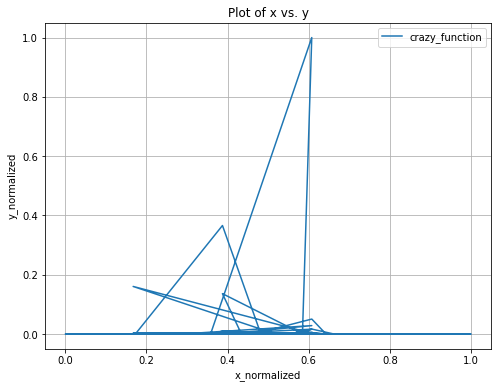

63/63 [==============================] - 0s 579us/step
Neural Network Approximation MSE: 0.0005


In [57]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error





x = x[1:]
y = y[1:]

# Create a plot



x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x))
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(8, 6))
plt.plot(x_normalized, y_normalized, label='crazy_function')
plt.xlabel('x_normalized')
plt.ylabel('y_normalized')
plt.title('Plot of x vs. y')
plt.legend()
plt.grid(True)
plt.show()


# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_normalized, test_size=0.2, random_state=42)

# Define a simple feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(x_train, y_train, epochs=100, verbose=0)

# Make predictions on the test set
neural_network_predictions = model.predict(x_test).flatten()

# Calculate the Mean Squared Error (MSE)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)

# Print the MSE for the neural network
print(f'Neural Network Approximation MSE: {neural_network_mse:.4f}')


In [58]:
import numpy as np
import statsmodels.api as sm

# Fit an OLS linear regression model using x_train and y_train
x_train_with_const = sm.add_constant(x_train)  # Add a constant term for the intercept
model = sm.OLS(y_train, x_train_with_const).fit()

# Get the predicted values for both x_train and x_test
x_test_with_const = sm.add_constant(x_test)  # Add a constant term for the intercept
predicted_train = model.predict(x_train_with_const)
predicted_test = model.predict(x_test_with_const)

# Calculate the MSE for the linear approximation on x_train and x_test
mse_train = mean_squared_error(y_train, predicted_train)
mse_test = mean_squared_error(y_test, predicted_test)

# Print the summary of the OLS regression results
print(model.summary())

print(f'OLS Linear Regression MSE on Training Data: {mse_train:.4f}')
print(f'OLS Linear Regression MSE on Test Data: {mse_test:.4f}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.023
Date:                Thu, 19 Oct 2023   Prob (F-statistic):             0.0821
Time:                        15:26:12   Log-Likelihood:                 31465.
No. Observations:                7999   AIC:                        -6.293e+04
Df Residuals:                    7997   BIC:                        -6.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.185      0.0

In [60]:
from numpy.polynomial import Polynomial

degree = 5  # Choose the degree of the polynomial
coefficients = np.polyfit(x_train, y_train, degree)
polynomial_approximation = Polynomial(coefficients)
# Evaluate the polynomial at test data points
polynomial_interpolated_test = polynomial_approximation(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, polynomial_interpolated_test)
print(f'Polynomial Approximation MSE: {mse:.4f}')



Polynomial Approximation MSE: 0.0005


In [61]:
import numpy as np
from scipy.special import hermite, legendre, laguerre, chebyt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate random x values and compute the corresponding y values


# Legendre polynomial approximation
degree = 2  # Choose the degree of the Legendre polynomial
legendre_nodes_train = np.linspace(-1, 1, len(x_train))
legendre_coefficients = np.polynomial.legendre.legfit(legendre_nodes_train, y_train, degree)
legendre_interpolated_train = np.polynomial.legendre.legval(x_train, legendre_coefficients)
legendre_interpolated_test = np.polynomial.legendre.legval(x_test, legendre_coefficients)
legendre_mse = mean_squared_error(y_test, legendre_interpolated_test)
print(f'Legendre Polynomial Approximation MSE: {legendre_mse:.4f}')

# Laguerre polynomial approximation
degree = 2  # Choose the degree of the Laguerre polynomial
laguerre_nodes_train = np.linspace(0, np.max(x_train), len(x_train))
laguerre_coefficients = np.polynomial.laguerre.lagfit(laguerre_nodes_train, y_train, degree)
laguerre_interpolated_train = np.polynomial.laguerre.lagval(x_train, laguerre_coefficients)
laguerre_interpolated_test = np.polynomial.laguerre.lagval(x_test, laguerre_coefficients)
laguerre_mse = mean_squared_error(y_test, laguerre_interpolated_test)
print(f'Laguerre Polynomial Approximation MSE: {laguerre_mse:.4f}')

# Hermite polynomial approximation
degree = 4  # Choose the degree of the Hermite polynomial
hermite_nodes_train = np.linspace(-1, 1, len(x_train))
hermite_coefficients = np.polyfit(hermite_nodes_train, y_train, degree)
hermite_interpolated_train = np.polyval(hermite_coefficients, x_train)
hermite_interpolated_test = np.polyval(hermite_coefficients, x_test)
hermite_mse = mean_squared_error(y_test, hermite_interpolated_test)
print(f'Hermite Polynomial Approximation MSE: {hermite_mse:.4f}')

# Chebyshev polynomial approximation
degree = 5  # Choose the degree of the Chebyshev polynomial
chebyshev_nodes_train = np.linspace(-1, 1, len(x_train))
chebyshev_coefficients = np.polynomial.chebyshev.chebfit(chebyshev_nodes_train, y_train, degree)
chebyshev_interpolated_train = np.polynomial.chebyshev.chebval(x_train, chebyshev_coefficients)
chebyshev_interpolated_test = np.polynomial.chebyshev.chebval(x_test, chebyshev_coefficients)
chebyshev_mse = mean_squared_error(y_test, chebyshev_interpolated_test)
print(f'Chebyshev Polynomial Approximation MSE: {chebyshev_mse:.4f}')


Legendre Polynomial Approximation MSE: 0.0005
Laguerre Polynomial Approximation MSE: 0.0005
Hermite Polynomial Approximation MSE: 0.0005
Chebyshev Polynomial Approximation MSE: 0.0005


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(1,)),  # Input layer
    layers.Dense(3, activation='sigmoid'),  # Hidden layer with 64 units and ReLU activation
#    layers.Dense(10, activation='sigmoid'),  # Another hidden layer with 64 units and ReLU activation
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1000, verbose=0)

# Evaluate the model
loss = model.evaluate(x_test, y_test, verbose=0)
print(f'Mean Squared Error: {loss}')

# Generate predictions



y_pred = model.predict(x_test)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual Data', alpha=0.5)
plt.plot(x_test, y_pred, color='red', label='Neural Network Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




